In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Binary Tries

In [2]:
import graphviz as gv

Ths notebook presents <em style="color:blue;">binary tries</em>.  We define the set $\texttt{BT}$ of binary tries by induction:

  - $\texttt{Nil} \in \texttt{BT}$.
  - $\texttt{Bin}(v,l,r) \in \texttt{BT}$ provided that
      - $v \in \texttt{Value} \cup \{\Omega\}$  and
      - $l,r \in \texttt{BT}$.

The class `BinaryTrie` is a *superclass* for constructing binary tries.  It has one static variable `sNodeCount`.  This variable is used to equip all nodes with a unique identifier.  This identifier is used to draw the trees using `graphviz`.

Every object of class `BinaryTrie` has a unique identifier `mID` that is stored as a member variable.  

In [3]:
class BinaryTrie:
    sNodeCount = 0
    
    def __init__(self):
        BinaryTrie.sNodeCount += 1
        self.mID = BinaryTrie.sNodeCount
        
    def getID(self):
        return self.mID  # used only by graphviz

The function `make_string` is a helper function that is used to simplify the implementation of `__str__`.
  - `self` is the object that is to be rendered as a string
  - `attributes` is a list of those member variables that are used to produce the string

In [4]:
def _make_string(self, attributes):
        # map the function __str__ to all attributes and join them with a comma
        name = self.__class__.__name__
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in attributes]))})"
    
BinaryTrie._make_string = _make_string
del _make_string

The method $t.\texttt{toDot}()$ takes a binary trie $t$ and returns a graph that depicts the tree $t$.

In [5]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if isinstance(t, Nil):
            dot.node(str(n), label='', shape='point') 
        elif isinstance(t, Bin):
            if t.mValue != None:
                dot.node(str(n), label='{' + str(t.mDigit) + '|' + str(t.mValue) + '}')
            else:
                dot.node(str(n), label='{' + str(t.mDigit) + '|' + '}')
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if isinstance(t, Bin):
            dot.edge(str(n), str(t.mLeft .getID()))
            dot.edge(str(n), str(t.mRight.getID()))
    return dot

BinaryTrie.toDot = toDot
del toDot

The method $t.\texttt{collectIDs}(d)$ takes a binary trie $t$ and a dictionary $d$ and updates the dictionary so that the following holds:
$$ d[\texttt{id}] = n \quad \mbox{for every node $n$ in $t$.} $$
Here, $\texttt{id}$ is the unique identifier of the node $n$, i.e. $d$ associates the identifiers with the corresponding nodes.

In [6]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if isinstance(self, Bin):
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
        self.mLeft .mDigit = '0'
        self.mRight.mDigit = '1'
        
BinaryTrie._collectIDs = _collectIDs
del _collectIDs

The class `Nil` represents an empty binary trie.  It has no member variables of its own.

In [7]:
class Nil(BinaryTrie):
    def __init__(self):
        BinaryTrie.__init__(self)
          
    def __str__(self):
        return 'Nil()'

The class `Bin` represents a binary trie of the form $\texttt{Bin}(v,l,r)$.
It has three member variables:
* `mValue` is the value that is stored at this node.
* `mLeft`  is the left subtree.
* `mRight` is the right subtree.
* `mDigit` is a string that is used by `graphviz` to display the node.

In [8]:
class Bin(BinaryTrie):
    def __init__(self, value, left, right):
        BinaryTrie.__init__(self)
        self.mValue = value
        self.mLeft  = left
        self.mRight = right
        self.mDigit = '' # only used by graphviz

    def __str__(self):
        return _make_string(self, ['mValue', 'mLeft', 'mRight'])

## Implementing the Method  `find`

Given a binary trie $b$ and a natural number $n$, the expression
$$ b.\texttt{find}(n) $$ 
returns the value in $b$ that is associated with the number $n$.  If there is no value associated
with $b$, then the expression evaluates to $\Omega$.  Formally, the value of the expression
$b.\texttt{find}(n)$ is defined by induction on $b$ and $n$:
  - $\texttt{Nil}.\texttt{find}(n) = \Omega$,
  
    since the empty trie doesn't store any values.
  - $\texttt{Bin}(v,l,r).\texttt{find}(0) = v$,

    because $0$ is interpreted as the empty string $\varepsilon$.
  - $n \not= 0 \rightarrow \texttt{Bin}(v,l,r).\texttt{find}(2\cdot n) = l.\texttt{find}(n)$,

    because if a number is represented in binary, then the last bit of every even number is zero
    and zero chooses the left subtree.
  - $\texttt{Bin}(v,l,r).\texttt{find}(2 \cdot n + 1) = r.\texttt{find}(n)$,

    because if a number is represented in binary, then the last bit of every odd number is 1 and 
    1 is associated with the right subtree.

In [9]:
def find(self, n):
    return None

Nil.find = find
del find

In [10]:
def find(self, n):
    if n == 0:
        return self.mValue
    if n % 2 == 0:
        return self.mLeft.find(n // 2)
    else:
        return self.mRight.find(n // 2)
    
Bin.find = find
del find

## Implementing the Method  `insert`

Given a binary trie $b$, a natural number $n$ and a value $v$, the expression
$$  b.\texttt{insert}(n, v) $$
is defined by induction on $b$ and $n$:
  - $\texttt{Nil}.\texttt{insert}(0, v) = \texttt{Bin}(v, \texttt{Nil}, \texttt{Nil})$,
  - $n \not= 0 \rightarrow \texttt{Nil}.\texttt{insert}(2 \cdot n, v) = 
       \texttt{Bin}(\Omega, \texttt{Nil}.\texttt{insert}(n,v), \texttt{Nil})$,
  - $\texttt{Nil}.\texttt{insert}(2 \cdot n + 1, v) = 
       \texttt{Bin}(\Omega, \texttt{Nil}, \texttt{Nil}.\texttt{insert}(n,v))$,
  - $\texttt{Bin}(v_1,l,r).\texttt{insert}(0, v_2) = \texttt{Bin}(v_2, l, r)$,
  - $n \not= 0 \rightarrow \texttt{Bin}(v_1,l,r).\texttt{insert}(2 \cdot n, v_2) = 
       \texttt{Bin}\bigl(v_1, l.\texttt{insert}(n, v_2), r\bigr)$,
  - $\texttt{Bin}(v_1,l,r).\texttt{insert}(2 \cdot n + 1, v_2) = 
       \texttt{Bin}\bigl(v_1, l, r.\texttt{insert}(n, v_2)\bigr)$.

In [11]:
def insert(self, n, v):
    if n == 0:
        return Bin(v, Nil(), Nil())
    if n % 2 == 0:
        return Bin(None, Nil().insert(n // 2, v), Nil())
    else:
        return Bin(None, Nil(), Nil().insert(n // 2, v))
    
Nil.insert = insert
del insert

In [12]:
def insert(self, n, v):
    if n == 0:
        return Bin(v, self.mLeft, self.mRight)
    if n % 2 == 0:
        return Bin(self.mValue, self.mLeft.insert(n // 2, v), self.mRight)
    else:
        return Bin(self.mValue, self.mLeft, self.mRight.insert(n // 2, v))
    
Bin.insert = insert
del insert

## Implementing the Method  `delete`

First we have to implement a method `simplify` which is specified by the following equations:
  - $\texttt{Bin}(\Omega, \texttt{Nil}, \texttt{Nil}).\texttt{simplify}() = \texttt{Nil}$ 
  - $v \not= \Omega \vee l \not= \texttt{Nil} \vee r \not= \texttt{Nil} \rightarrow 
       \texttt{Bin}(v, l, r).\texttt{simplify}() = \texttt{Bin}(v, l, r)$. 

In [13]:
def simplify(self):
    if self.mValue == None and isinstance(self.mLeft, Nil) and isinstance(self.mRight, Nil):
        return Nil()
    return self

Bin.simplify = simplify
del simplify

  - $\texttt{Nil}.\texttt{delete}(n) = \texttt{Nil}$,
  - $\texttt{Bin}(v,l,r).\texttt{delete}(0) = \texttt{Bin}(\Omega, l, r).\texttt{simplify}()$,
  - $n \not= 0 \rightarrow \texttt{Bin}(v,l,r).\texttt{delete}(2 \cdot n) = 
       \texttt{Bin}\bigl(v, l.\texttt{delete}(n), r\bigr).\texttt{simplify}()$,
  - $\texttt{Bin}(v,l,r).\texttt{delete}(2 \cdot n + 1) = 
       \texttt{Bin}\bigl(v, l, r.\texttt{delete}(n)\bigr).\texttt{simplify}()$.

In [14]:
def delete(self, n):
    return self

Nil.delete = delete
del delete

In [15]:
def delete(self, n):
    if n == 0:
        self.mValue = None
        return self.simplify()
    if n % 2 == 0:
        self.mLeft = self.mLeft.delete(n // 2)
        return self.simplify()
    if n % 2 == 1:
        self.mRight = self.mRight.delete(n // 2)
        return self.simplify()
    
Bin.delete = delete
del delete

In [16]:
b = Nil()
b.toDot()

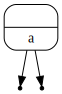

In [17]:
b = b.insert(0, 'a')
b.toDot()

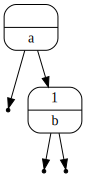

In [18]:
b = b.insert(1, 'b')
b.toDot()

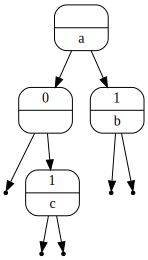

In [19]:
b = b.insert(2, 'c')
b.toDot()

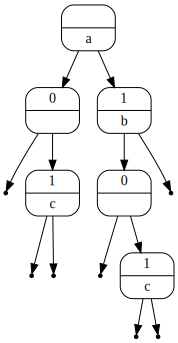

In [20]:
b = b.insert(5, 'c')
b.toDot()

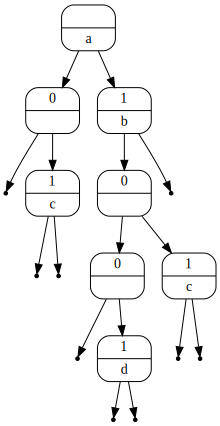

In [21]:
b = b.insert(9, 'd')
b.toDot()

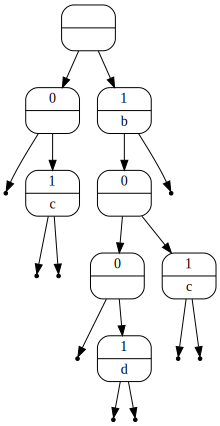

In [22]:
b = b.delete(0)
b.toDot()

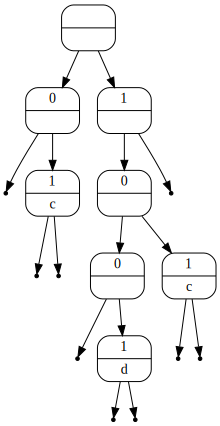

In [23]:
b = b.delete(1)
b.toDot()

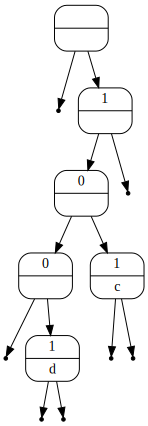

In [24]:
b = b.delete(2)
b.toDot()

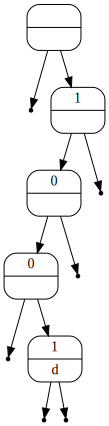

In [25]:
b = b.delete(5)
b.toDot()

In [26]:
b = b.delete(9)
b.toDot()

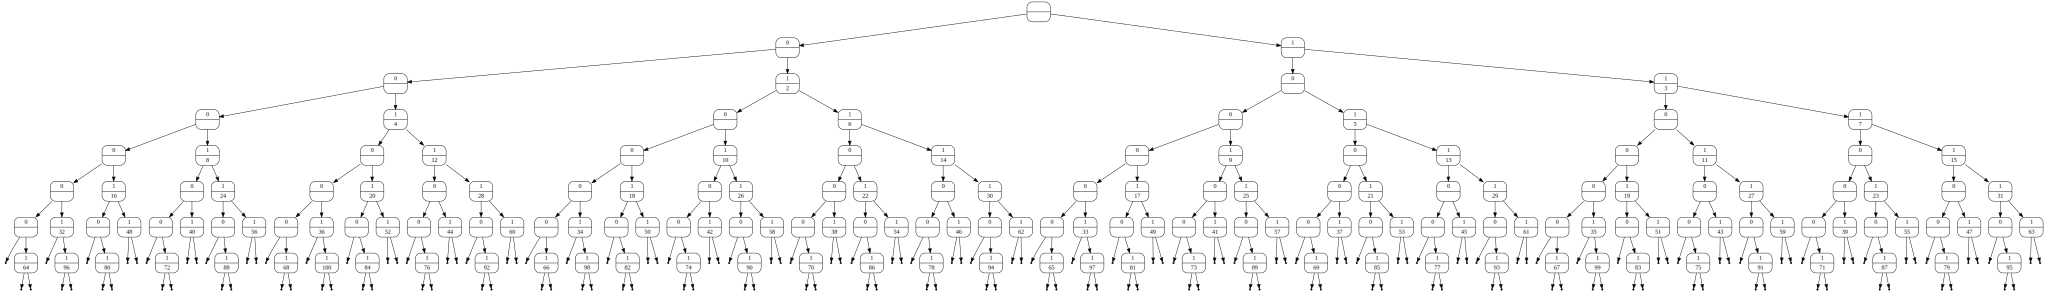

In [27]:
Primes = Nil()
for i in range(2, 101):
    Primes = Primes.insert(i, i)
Primes.toDot()

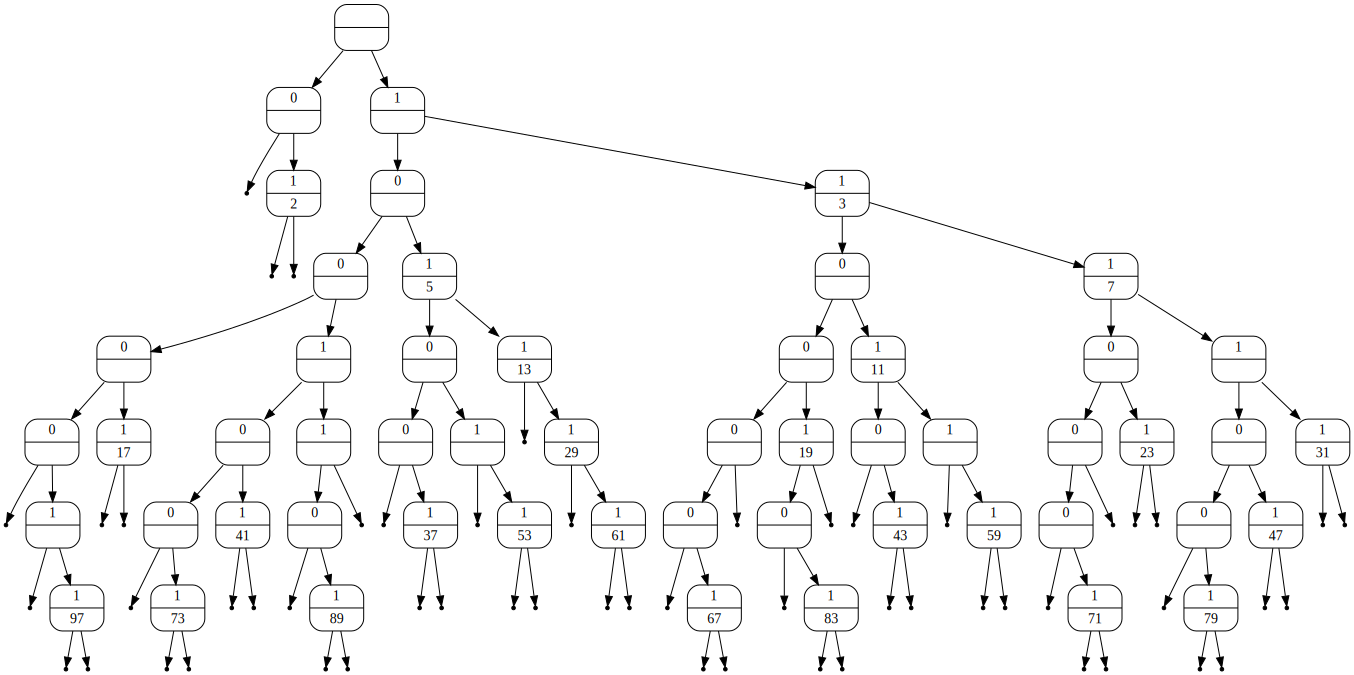

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

In [28]:
for i in range(2, 101):
    for j in range(i, 101):
        Primes = Primes.delete(i * j)
display(Primes.toDot())
for i in range(2, 101):
    if Primes.find(i):
        print(i, end=' ')